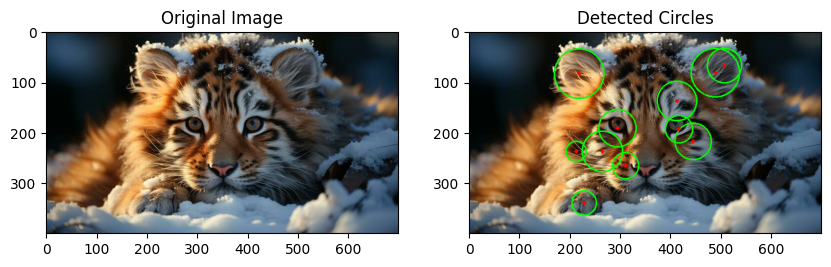

In [3]:
!pip install opencv-python
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Load the image
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/lab.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur to reduce noise
gray_blur = cv2.GaussianBlur(gray, (9, 9), 2)

# Perform Hough Circle Transform
circles = cv2.HoughCircles(
    gray_blur, cv2.HOUGH_GRADIENT, dp=1, minDist=20,
    param1=50, param2=30, minRadius=10, maxRadius=50
)

# Draw circles on the image
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        # Draw the circle
        cv2.circle(image, (i[0], i[1]), i[2], (0, 255, 0), 2)
        # Draw the circle's center
        cv2.circle(image, (i[0], i[1]), 2, (0, 0, 255), 3)

# Display the result
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title('Original Image')
# Assuming 'image.jpg' is in the same directory as 'lab.jpg'
# Otherwise, adjust the path accordingly.
plt.imshow(cv2.cvtColor(cv2.imread('/content/drive/MyDrive/Colab Notebooks/lab.jpg'), cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.title('Detected Circles')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

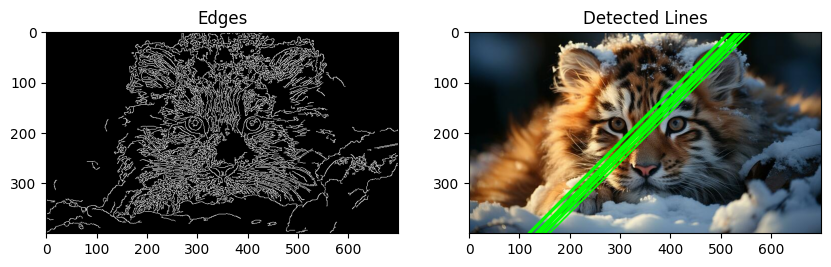

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/lab.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply edge detection
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Perform Hough Line Transform
lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)

# Draw lines on the image
if lines is not None:
    for rho, theta in lines[:, 0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Display the result
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title('Edges')
plt.imshow(edges, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Detected Lines')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
